# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df_merged = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview
print(df_merged)

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        a203    Infubinol  Female          20          23          0   
1        a203    Infubinol  Female          20          23          5   
2        a203    Infubinol  Female          20          23         10   
3        a203    Infubinol  Female          20          23         15   
4        a203    Infubinol  Female          20          23         20   
...       ...          ...     ...         ...         ...        ...   
1888     z969     Naftisol    Male           9          30         25   
1889     z969     Naftisol    Male           9          30         30   
1890     z969     Naftisol    Male           9          30         35   
1891     z969     Naftisol    Male           9          30         40   
1892     z969     Naftisol    Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              48.508468         

In [4]:
# Checking the number of mice.
#mouse_count = df_merged["Mouse ID"].count()
#mouse_count
mouse_count = df_merged["Mouse ID"].nunique()
mouse_count

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#array(['g989'], dtype=object)
mice_dup = df_merged.loc[df_merged.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
mice_dup

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID.
all_mice_dup = df_merged.loc[df_merged["Mouse ID"] == "g989", :]
all_mice_dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df_merged[df_merged['Mouse ID'].isin(mice_dup)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
#mouse_count = len(clean_df.index)
#print(mouse_count) 
clean_mouse_count = clean_df["Mouse ID"].nunique()
clean_mouse_count

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_reg = df_merged["Drug Regimen"].unique()
print(drug_reg)
mean = clean_df['Tumor Volume (mm3)'].mean()
median = clean_df['Tumor Volume (mm3)'].median()
var = clean_df['Tumor Volume (mm3)'].var()
std = clean_df['Tumor Volume (mm3)'].std()
sem = clean_df['Tumor Volume (mm3)'].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()
summary_df = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
summary_df

['Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn' 'Zoniferol' 'Ramicane'
 'Ketapril' 'Propriva' 'Naftisol' 'Capomulin']


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_df2 =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

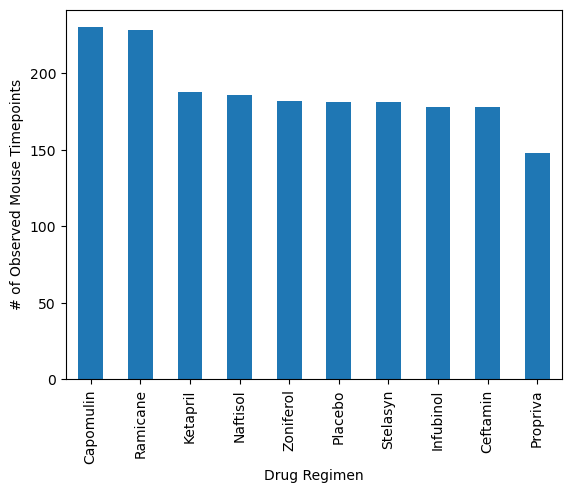

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#clean_df.plot.bar(x=(clean_df["Drug Regimen"].index.values, y=(clean_df["Drug Regimen"].values))
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plot_pandas = clean_df["Drug Regimen"].value_counts().plot.bar()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Infubinol'),
  Text(8, 0, 'Ceftamin'),
  Text(9, 0, 'Propriva')])

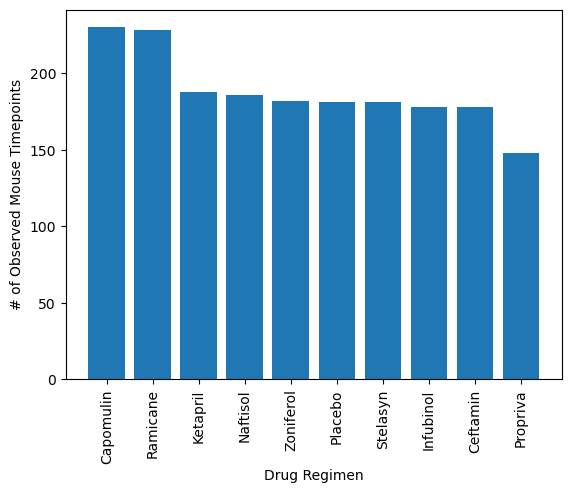

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = (clean_df["Drug Regimen"].value_counts()).index.values
y_axis = (clean_df["Drug Regimen"].value_counts()).values
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.bar(x_axis, y_axis)
plt.xticks(rotation=90)

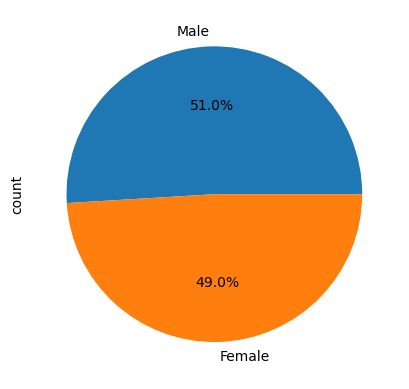

In [13]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_data = clean_df["Sex"].value_counts()

# Make the pie chart
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()

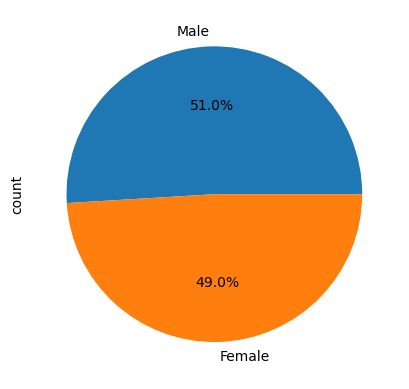

In [14]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
labels = ['Female', 'Male']
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
# Make the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse
timepoint = clean_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index()
timepoint =timepoint.rename(columns={'Timepoint': 'Max Timepoint'})
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#merge_df = timepoint.merge(clean_df,on=["Mouse ID","Timepoint"])
merge_df =pd.merge(clean_df, timepoint, on='Mouse ID')

regimens_df = merge_df[merge_df["Drug Regimen"].isin(regimens)]
regimens_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,a203,Infubinol,Female,20,23,0,45.000000,0,45
1,a203,Infubinol,Female,20,23,5,48.508468,0,45
2,a203,Infubinol,Female,20,23,10,51.852437,1,45
3,a203,Infubinol,Female,20,23,15,52.777870,1,45
4,a203,Infubinol,Female,20,23,20,55.173336,1,45
...,...,...,...,...,...,...,...,...,...
1855,z581,Infubinol,Female,24,25,25,54.316407,2,45
1856,z581,Infubinol,Female,24,25,30,56.286750,2,45
1857,z581,Infubinol,Female,24,25,35,58.628399,3,45
1858,z581,Infubinol,Female,24,25,40,60.053740,3,45


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in regimens:
    quartiles = merge_df["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
    #quartiles = final_tumor_volume.quantile([0.25,0.5,0.75])
    lower = quartiles[0.25]
    upper = quartiles[0.75]
    mean = merge_df["Tumor Volume (mm3)"].mean()
    #mean = final_tumor_volume.mean()
    iqr = upper-lower
    lower_bound = lower-(1.5*iqr)
    upper_bound = upper+(1.5*iqr)

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = merge_df.loc[merge_df['Drug Regimen'] ==drug, 'Tumor Volume (mm3)']
    final_tumor_volumes = merge_df.loc[merge_df['Timepoint'] == merge_df['Max Timepoint']]['Tumor Volume (mm3)']

    # add subset
    tumor_volume_data.append(final_tumor_volumes)

    # Determine outliers using upper and lower bounds
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound)|(tumor_volumes < upper_bound)]
print(outliers)

30      45.000000
31      46.795257
32      47.371343
33      49.734404
34      50.513437
          ...    
1828    57.173538
1829    59.033275
1830    61.153140
1831    63.469549
1832    64.729837
Name: Tumor Volume (mm3), Length: 178, dtype: float64


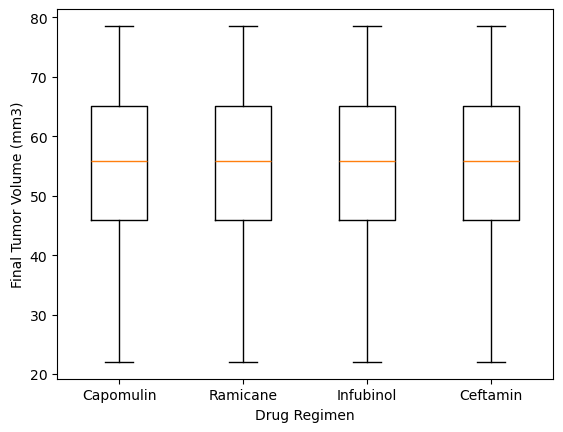

In [17]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(tumor_volume_data, labels=regimens)
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

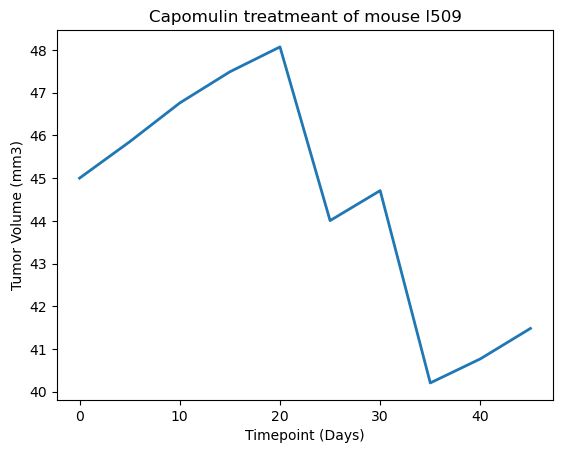

In [206]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
regimens2 = ["Capomulin"]
Capomulin_df = merge_df[merge_df["Drug Regimen"].isin(regimens2)]
#Capomulin_df.head, l509
single_mouse = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]

x_axis = single_mouse["Timepoint"]
y_axis = single_mouse["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, y_axis, linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

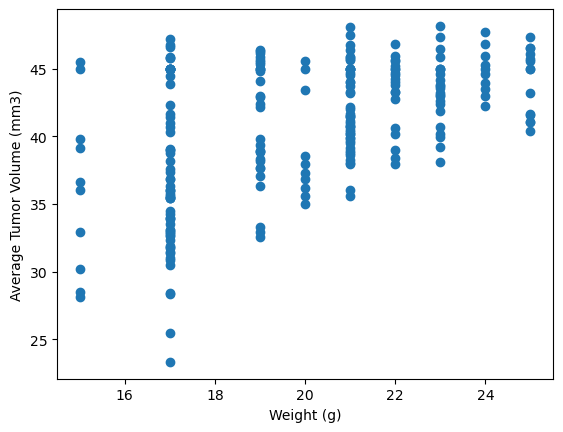

In [47]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
#regimens2 = ["Capomulin"]
#Capomulin_df = merge_df[merge_df["Drug Regimen"].isin(regimens2)]
Capomulin_df2 = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
#Capomulin_mean = Capomulin_df2.groupby(['Mouse ID']).mean()
#Capomulin_df2['Mouse ID'] =pd.to_numeric(Capomulin_df2['Mouse ID'] ,errors='coerce')
#mean = Capomulin_df2['Mouse ID'].mean()

plt.scatter(Capomulin_df2['Weight (g)'],Capomulin_df2['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

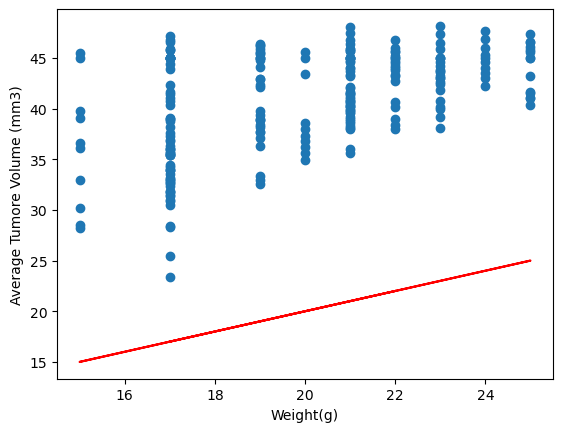

In [48]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

y_values = Capomulin_df2['Weight (g)']
plt.scatter(Capomulin_df2['Weight (g)'],Capomulin_df2['Tumor Volume (mm3)'])
plt.plot(Capomulin_df2['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.show()
#print (The correlation between mouse weight and the average tumor volume is 0.84)